# ASSIGNMENT 07: MULTIPLE LINEAR REGRESSION

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
data = pd.read_csv("ToyotaCorolla - MLR.csv")

In [ ]:
data.shape

(1436, 11)

In [ ]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

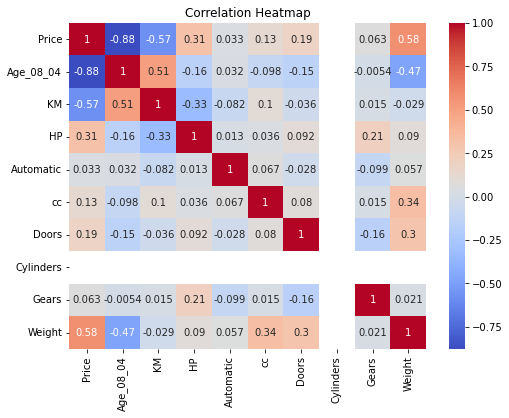

In [ ]:
plt.figure(figsize=(8,6))
numeric_data = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

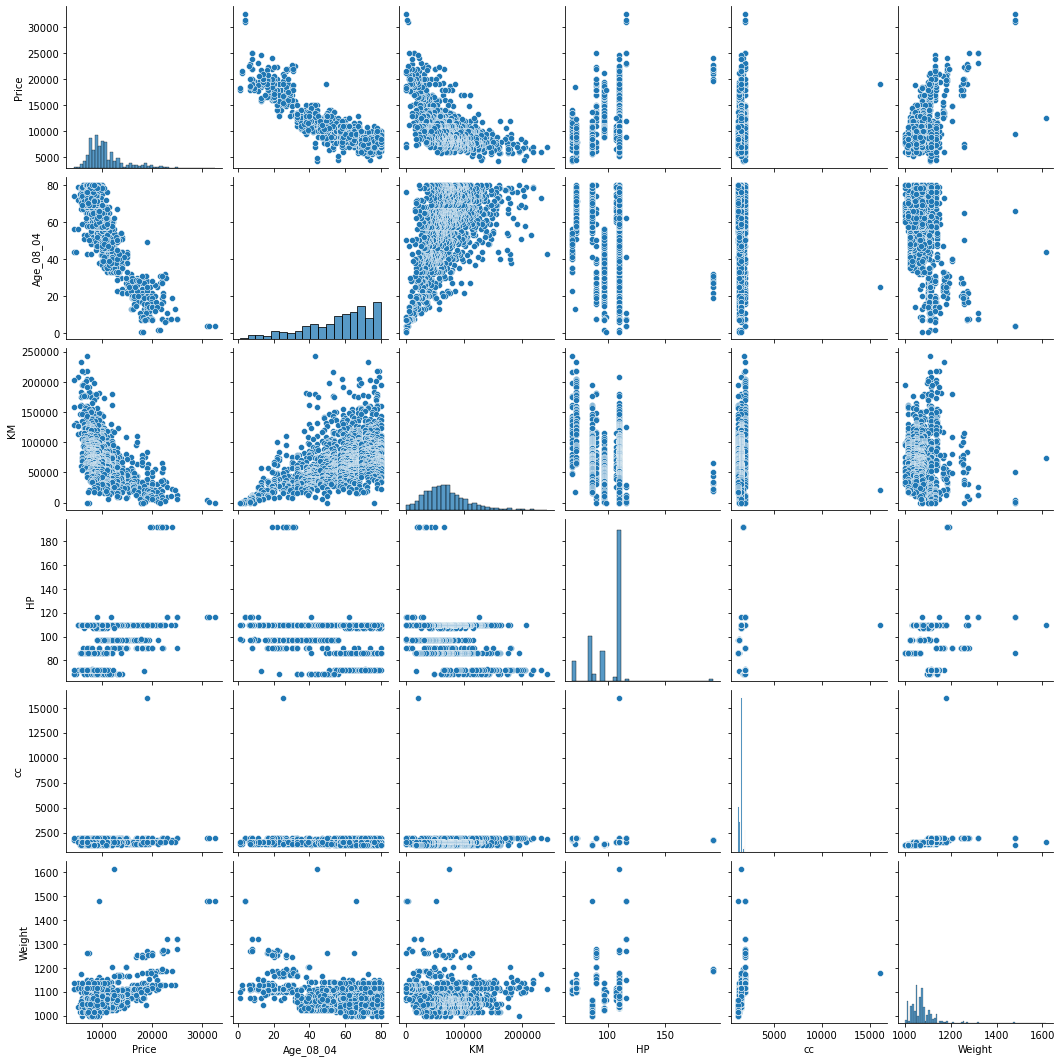

In [ ]:
sns.pairplot(data[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']])
plt.show()

In [ ]:
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)

In [ ]:
X = data[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight', 
          'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Automatic']]
y = data['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Basic Multiple Linear Regression

In [ ]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [ ]:
"R2 Score:", r2_score(y_test, y_pred1)

('R2 Score:', 0.8332952678447364)

In [ ]:
"RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1))

('RMSE:', 1491.4107550884644)

In [ ]:
coeff_df = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])

In [ ]:
coeff_df

,Coefficient
Age_08_04,-120.823078
KM,-0.015927
HP,15.777213
cc,-0.030236
Doors,-84.483547
Weight,26.069186
Fuel_Type_Diesel,4.202110
Fuel_Type_Petrol,1453.694461
Automatic,93.081993


# Reduced Features

In [ ]:
X_reduced = X[['Age_08_04', 'KM', 'HP', 'Weight']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [ ]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [ ]:
"R2 Score:", r2_score(y_test2, y_pred2)

('R2 Score:', 0.8506068681500581)

In [ ]:
"RMSE:", np.sqrt(mean_squared_error(y_test2, y_pred2))

('RMSE:', 1411.8502091132302)

# Interaction Term

In [ ]:
X3 = X.copy()
X3['AgeKM'] = X3['Age_08_04'] * X3['KM']

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=42)
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [ ]:
"R2 Score:", r2_score(y_test3, y_pred3)

('R2 Score:', 0.8599771389915241)

In [ ]:
"RMSE:", np.sqrt(mean_squared_error(y_test3, y_pred3))

('RMSE:', 1366.8560523065687)

# Lasso Regression

In [ ]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [ ]:
"R2 Score:", r2_score(y_test, y_pred_lasso)

('R2 Score:', 0.8335034945638271)

In [ ]:
"RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso))

('RMSE:', 1490.4790220761577)

# Ridge Regression

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
"R2 Score:", r2_score(y_test, y_pred_ridge)

('R2 Score:', 0.8335556420169218)

In [ ]:
"RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge))

('RMSE:', 1490.2455914357606)

# Comparison

In [ ]:
results = pd.DataFrame({
    "Model": ["Basic MLR", "Reduced MLR", "Interaction MLR", "Lasso", "Ridge"],
    "R2 Score": [
        r2_score(y_test, y_pred1),
        r2_score(y_test2, y_pred2),
        r2_score(y_test3, y_pred3),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_ridge)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred1)),
        np.sqrt(mean_squared_error(y_test2, y_pred2)),
        np.sqrt(mean_squared_error(y_test3, y_pred3)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    ]
})

In [ ]:
results

,Model,R2 Score,RMSE
0,Basic MLR,0.833295,1491.410755
1,Reduced MLR,0.850607,1411.850209
2,Interaction MLR,0.859977,1366.856052
3,Lasso,0.833503,1490.479022
4,Ridge,0.833556,1490.245591





RMSE → Root Mean Squared Error
➤ It measures how far the predicted values are from the actual values lower RMSE means better accuracy.

R² (R2) → Coefficient of Determination
➤ It shows how well the independent variables explain the variation in the dependent variable higher R² means a better fit.